<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/web_scraping_a_trading_websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DoWNLOADIND AND PARSING THE WEBSITES

In [8]:
import requests
from bs4 import BeautifulSoup
page=requests.get(" https://www.investing.com")
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify())



<!DOCTYPE html>
<html class="html" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8" data-next-head=""/>
  <meta content="initial-scale=1.0,width=device-width" data-next-head="" name="viewport"/>
  <script>
   window.isCCPA=true;window.isConsentCCPA=true;window.OptanonWrapper=function(){};window.OneTrust={};
  </script>
  <script amp="true" data-domain-script="265d5ac2-7d0c-4675-bf4d-421a61fb482e" src="https://cookie-cdn.cookiepro.com/scripttemplates/otSDKStub.js">
  </script>
  <script ccpa-opt-out-geo="all" ccpa-opt-out-ids="C0004" ccpa-opt-out-lspa="false" src="//cdn.cookielaw.org/opt-out/otCCPAiab.js">
  </script>
  <script async="" src="//securepubads.g.doubleclick.net/tag/js/gpt.js">
  </script>
  <link data-next-head="" href="https://www.investing.com" rel="canonical"/>
  <link data-next-head="" href="https://www.investing.com/" hreflang="x-default" rel="alternate"/>
  <link data-next-head="" href="https://il.investing.com/" hreflang="he-il" rel="alternate"/>
  <link data-nex

## EXTRACTING THE FILE

In [9]:
# Get the table
table = soup.find('table', class_='ratesTable')

In [10]:
import requests
from bs4 import BeautifulSoup

url = "https://www.x-rates.com/table/?from=USD&amount=1"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Get the table
table = soup.find('table', class_='ratesTable')

# Get the first row (after the header)
first_row = table.find_all('tr')[1]
cols = first_row.find_all('td')

# Extract like your teacher's way:
currency = cols[0].get_text()
rate = cols[1].get_text()

print("Currency:", currency)
print("Rate:", rate)

Currency: Euro
Rate: 0.866215


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Get the page
url = "https://www.x-rates.com/table/?from=USD&amount=1"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Find the table with the rates
table = soup.find('table', class_='ratesTable')

# Step 3: Create empty list to store data
data = []

# Step 4: Loop through all rows (skip the first one - the header)
rows = table.find_all('tr')[1:]

for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 2:
        currency = cols[0].get_text(strip=True)
        rate = cols[1].get_text(strip=True)
        data.append({'Currency': currency, 'Rate': rate})

# Step 5: Create dataframe
df = pd.DataFrame(data)

# Step 6: Show the dataframe
print(df)


                Currency        Rate
0                   Euro    0.865980
1          British Pound    0.737428
2           Indian Rupee   86.056851
3      Australian Dollar    1.540967
4        Canadian Dollar    1.359392
5       Singapore Dollar    1.281837
6            Swiss Franc    0.812005
7      Malaysian Ringgit    4.246137
8           Japanese Yen  144.168226
9  Chinese Yuan Renminbi    7.184044


In [12]:
# Step 1: Import the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 2: Get the page content
url = "https://www.x-rates.com/table/?from=USD&amount=1"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find the exchange rates table
table = soup.find('table', class_='ratesTable')

# Step 4: Prepare an empty list to store results
data = []

# Step 5: Get all the rows except the header row
rows = table.find_all('tr')[1:]

# Step 6: Loop through each row and extract the text
for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 2:
        currency = cols[0].get_text(strip=True)
        rate = cols[1].get_text(strip=True)
        data.append({
            'Currency': currency,
            'Rate': rate
        })

# Step 7: Convert the list of data into a DataFrame
df = pd.DataFrame(data)

# Step 8: Display the DataFrame
print(df)


                Currency        Rate
0                   Euro    0.865795
1          British Pound    0.737302
2           Indian Rupee   86.046072
3      Australian Dollar    1.540842
4        Canadian Dollar    1.359262
5       Singapore Dollar    1.281822
6            Swiss Franc    0.811841
7      Malaysian Ringgit    4.246219
8           Japanese Yen  144.139620
9  Chinese Yuan Renminbi    7.184054


In [13]:
# Convert 'Rate' column to float (numerical)
df['Rate'] = df['Rate'].astype(float)


In [14]:
# Check basic info about the data
print(df.info())

# See the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Currency  10 non-null     object 
 1   Rate      10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes
None
            Currency       Rate
0               Euro   0.865795
1      British Pound   0.737302
2       Indian Rupee  86.046072
3  Australian Dollar   1.540842
4    Canadian Dollar   1.359262


In [15]:
# Summary stats like min, max, mean
print(df.describe())

             Rate
count   10.000000
mean    24.821283
std     49.549811
min      0.737302
25%      0.969802
50%      1.450052
75%      6.449595
max    144.139620


In [16]:
print(df.sort_values('Rate').head(5))

           Currency      Rate
1     British Pound  0.737302
6       Swiss Franc  0.811841
0              Euro  0.865795
5  Singapore Dollar  1.281822
4   Canadian Dollar  1.359262


In [17]:
print(df.sort_values('Rate', ascending=False).head(5))

                Currency        Rate
8           Japanese Yen  144.139620
2           Indian Rupee   86.046072
9  Chinese Yuan Renminbi    7.184054
7      Malaysian Ringgit    4.246219
3      Australian Dollar    1.540842


In [18]:
kenya = df[df['Currency'].str.contains("Kenyan Shilling", case=False)]
print(kenya)

Empty DataFrame
Columns: [Currency, Rate]
Index: []


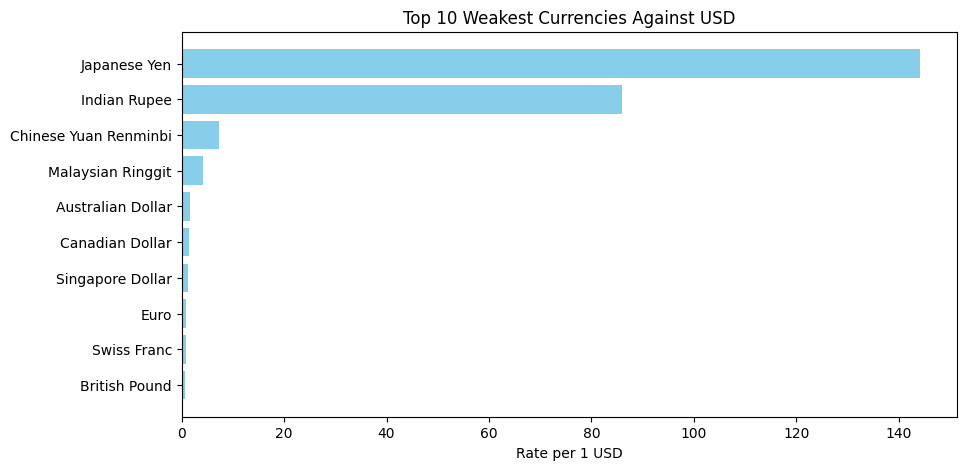

In [19]:
import matplotlib.pyplot as plt

# Plot top 10 currencies with highest rate
top_10 = df.sort_values('Rate', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_10['Currency'], top_10['Rate'], color='skyblue')
plt.xlabel('Rate per 1 USD')
plt.title('Top 10 Weakest Currencies Against USD')
plt.gca().invert_yaxis()  # Strongest on top
plt.show()